# Chapter 7: Multi-Class Image Classification

We’ll explain different image augmentation techniques such as rotations, horizontal and vertical shifts and flips. We'll then apply them on multi-class image classifications. You'll also learn the preferred loss function and activation function to use in multi-class classifications. 



After you finish this chapter, you'll be able to create the following animation to show how the predictions of the model change when the training progresses. On the left, you'll see that before training, the deep neural network assigns a 12.17% probability that the picture is a truck. After 125 epochs of training, the model assigns a 98.76% probability that the picture is a truck. On the right, you see that the model's predictions are 8.78% and 99.86% that the picture is a frog before and after training, respectively:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_truck_frog.gif" /> 

## 1. How Does Image Augmentation Work?
Image augmentation works by modifying the original training data in order to have better predictions. 
For example, if you have a horizontal flip image of a horse, it is still a horse. Similarly, if you tilt a picture of a cat 45 degrees clockwise or counterclockwise, it is still a cat.


The *keras* API by ***tensorflow*** has several built-in image augmentation techniques that we can readily use in order to improve the prediction accuracy. I’ll show you a few examples here.


### 1.1. The Keras Image Generator 
If you go to the *keras* API documentation site on *ImageDataGenerator()* https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator, you’ll see that it generates batches of tensor image data with augmentation. 
The site provides the following sample code on how to generate augmented image data

```python
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
```

The above code uses four different augmentation methods: rotation, width shift, height shit, and horizontal flip. We’ll discuss them one by one.

### 1.2. Rotation
If you rotate a picture of a horse 20 or 30 degrees either clockwise or counter clockwise, it’s still a horse. By doing this, you feed more pictures to the model and this will improve the model’s ability to identify an object. 

You can go to my website https://gattonweb.uky.edu/faculty/lium/ml/horse.jpg to download this sample image of a horse. Save it in the folder /files/ch07/.
<img src="https://gattonweb.uky.edu/faculty/lium/ml/horse.jpg"/>

We’ll use this image as our example.

It’s a high resolution picture of a horse, which is not in the CIFAR-10 dataset. We use a higher resolution picture to magnify the effect. 

The following script rotates the original picture 25, 30, 35, and 40 degrees respectively, and plot them out.

C:\Users\hlliu2\Anaconda3\envs\animatedML\lib\site-packages\keras\preprocessing\image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\hlliu2\Anaconda3\envs\animatedML\lib\site-packages\keras\preprocessing\image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


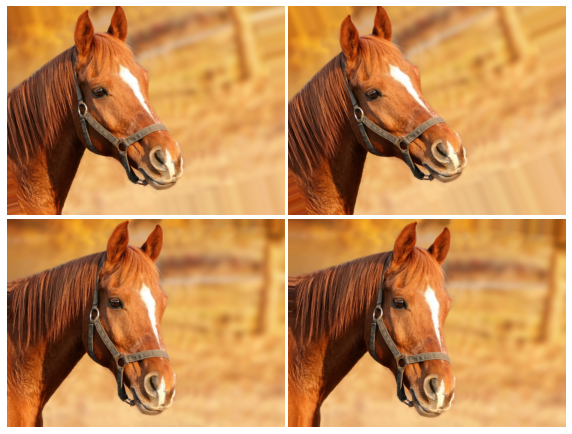

In [3]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load up the image from the folder
image = PIL.Image.open('files/ch07/horse.jpg')
nparray = np.asarray(image)

pics =[]
# Convert the image to numpy array
nparray = np.expand_dims(nparray,0)

for i in range(4):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
              rescale=1./255,
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20+5*i)
    img_iterator = datagen.flow(nparray, batch_size=1)
    pic = img_iterator.next()
    pics.append(pic)

plt.figure(figsize=(10,10))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, 2*i+j+1)
        plt.imshow(pics[2*i+j][0])
        plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=-0.36)

plt.show()

### 1.3. Vertical Shift
You can shift the image vertically to up or down and this will still be an image of the original object. 


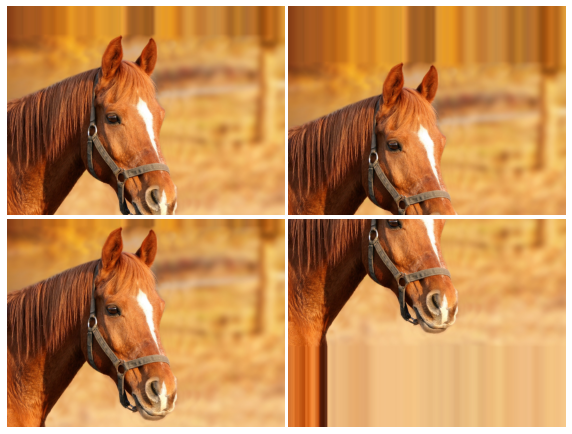

In [5]:
pics =[]
for i in range(4):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
              rescale=1./255,
        featurewise_center=True,
        featurewise_std_normalization=True,
        width_shift_range=0.1+0.1*i)
    img_iterator = datagen.flow(nparray, batch_size=1)
    pic = img_iterator.next()
    pics.append(pic)
plt.figure(figsize=(10,10))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, 2*i+j+1)
        plt.imshow(pics[2*i+j][0])
        plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=-0.36)

plt.show()

### 1.4. Horizontal Shift
You can shift the image horizontally to either size and this will still be an image of the original object. 

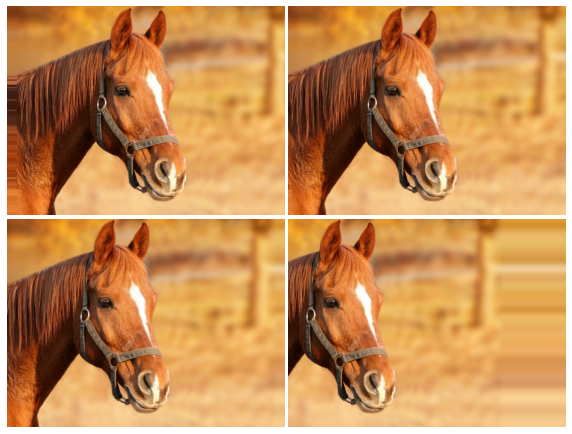

In [6]:
pics =[]
for i in range(4):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
              rescale=1./255,
        featurewise_center=True,
        featurewise_std_normalization=True,
        height_shift_range=0.1+0.1*i)
    img_iterator = datagen.flow(nparray, batch_size=1)
    pic = img_iterator.next()
    pics.append(pic)

plt.figure(figsize=(10,10))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, 2*i+j+1)
        plt.imshow(pics[2*i+j][0])
        plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=-0.36)

plt.show()

### 1.5. Horizontal Flip
You can flip a picture horizontally to create a mirror image of the original picture. The object remains the same. 

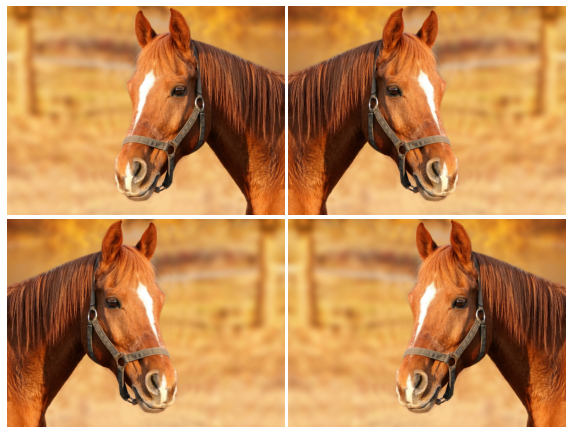

In [8]:
pics =[]
for i in range(4):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
              rescale=1./255,
        featurewise_center=True,
        featurewise_std_normalization=True,
        horizontal_flip=True)
    img_iterator = datagen.flow(nparray, batch_size=1)
    pic = img_iterator.next()
    pics.append(pic)

plt.figure(figsize=(10,10))
for i in range(2):
    for j in range(2):
        plt.subplot(2,2, 2*i+j+1)
        plt.imshow(pics[2*i+j][0])
        plt.axis('off')
plt.subplots_adjust(wspace=0.01,hspace=-0.36)

plt.show()

Two horses remain the same as the original, and two are mirror images of the original.

Note that the results are random, so you may get a different result. 

## 2. Difference Between Binary and Multi-Class Classification
Now we switch to the multi-class classification problem. 

The CIFAR-10 dataset contains ten classes of objects: Planes, cars, birds, cats, deer, dog, frogs, horses, ship, and trucks. We’ll use the DNN model to identify those objects. 

But before we do that, we need to change a few things in the deep neural network that we used for binary classification in Chapter 6. Specifically, we need to change the label, the activation function, and the loss function.

### 2.1. One-Hot Encoder for Labels
In the binary classification problem, we use a dummy variable to differentiate the targets: 1 for one class and 0 for the other class. For example, in Chapters 5 and 6, we use 1 to denote a horse and 0 a deer. 

Once we have more than two classes of objects, one single variable doesn’t work: a frog has a value of 6 while a dog has a value of 5, but the magnitude doesn’t mean anything. If we feed the variable to the computer, the model may mistakenly think that there is a meaning associated with the magnitude of the target and make wrong conclusions.

The solution is to create one variable for each object. The script below shows us how to do that.

In [9]:
import tensorflow as tf

labels = [0, 4, 9]
y = tf.keras.utils.to_categorical(labels, 10)
print(y)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In the example above, we have three labels: 0, 4, and 9. They represent a plane, a deer, and a truck in the CIFAR-10 dataset. 

We can use the *to_categorical()* method to change them into one-hot encoders (i.e., categorical variables). The second argument in the *to_categorical()* method, 10, indicates the depth of the categorical variable. This means each categorical variable will be a vector with a length of 10, with value 1 in one position and 0 in all others. 

A plane, which has an initial label of 0, now has a one-hot encoder label: a 10-value vector $$[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$$ The first value (i.e., index 0) is turned on as 1, and all the rest are turned off as 0. Similarly, a deer, which has a label of 4 originally, now has a one-hot encoder label of $$[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]$$ The fifth value (i.e., index 4) is turned on as 1, and all the rest are turned off as 0. By the same logic, a truck, with a label of 9, is now represented by $$
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]$$

### 2.2. The Softmax Activation Function
In the binary classification problem, we use sigmoid as our activation function. For multiple classification problems, we’ll change it to the softmax activation function. 

We have discussed the softmax activation function in Chapter 4. 

The softmax function has the form
$$y(x)=\frac {e^{x}} {\sum_{k=1}^{K}e^{x_k}}$$
where $x=[x_1,x_2,...,x_K]$ and $y=[y_1,y_2,...,y_K]$ are K-element lists. The i-th element of $y$ is 
$$y_i(x)=\frac {e^{x_i}} {\sum_{k=1}^{K}e^{x_k}}$$ 
The softmax function has a nice property: each element in the output vector $y$ is always between 0 and 1. Further, elements in the output vector $y$ sum up to 1. Because of this property, we use the softmax activation function to model the probability of a multiple outcome event. Therefore, the activation function in the output layer is always the softmax function when we model multi-class classification problems.  

### 2.3. The Loss Function in Multi-Class Classifications
The preferred loss function to use in multi-class classifications is the categorical-crossentropy loss function. It measures the average difference between the predicted distribution and the actual distribution. 

## 3. Train the Model 
We'll train a DNN model with convolutional layers and image augmentation. We'll use the whole CIFAR-10 dataset. Further, we'll use all three channels of the image, instead of just one.

### 3.1. Load the Full Dataset
We'll use all five batches of the CIFAR-1O dataset as the training dataset. We'll use the test batch as the testing dataset.

The script in the cell below loads up all the data.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

X = np.array([]).reshape(-1,32,32,3)
y = np.array([]).reshape(-1,)

for n in (1,2,3,4,5):
    dn = unpickle(f"files/cifar10/cifar-10-batches-py/data_batch_{n}")
    Xn = dn[b"data"].reshape(10000, 3, 32, 32).transpose(0,2,3,1)/255
    yn = np.array(dn[b'labels'])
    # concatenate the batches
    X = np.concatenate((X, Xn),axis=0)
    y = np.concatenate((y, yn),axis=0)
    
X_train = X.reshape(-1,32,32,3)
y_train = y.reshape(-1,)

# load the test dataset
test = unpickle(f"files/cifar10/cifar-10-batches-py/test_batch")
X_test = test[b"data"].reshape(10000, 3, 32, 32).transpose(0,2,3,1)/255
y_test = np.array(test[b'labels'])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


There are 5000 training images and 1000 testing images. Let's visualize some images from both the training and the testing dataset.

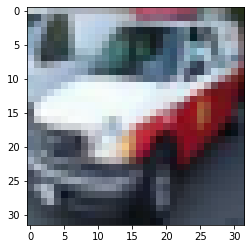

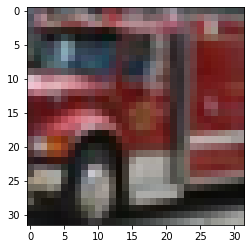

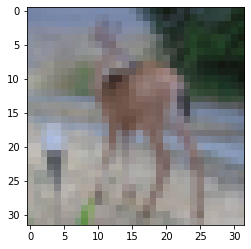

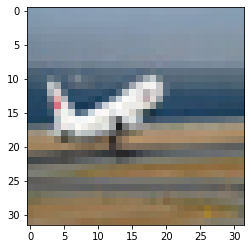

In [15]:
plt.imshow(X_train[60])
plt.show()  
plt.imshow(X_train[88])  
plt.show()

plt.imshow(X_test[100])
plt.show()  
plt.imshow(X_test[868])  
plt.show()

### 3.2. One-Hot Encode the Labels
Next, we'll one-hot encode the labels so that the neural network can process them. 

In [17]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Let's have a look at the shape of the new y_train dataset, and print out the first five observations.

In [18]:
print(y_train.shape)
print(y_train[0:5])
print(y_test.shape)
print(y_test[0:5])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(10000, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


The shape of the new y_train dataset is now (5000,10). The first five observations look correct. 

Now we are ready to feed the data into the DNN model for training purpose.

### 3.3. Train the Model
First we create a deep neural network with convolutional layers and max pooling as we did in Chapter 6. We make a few changes to adapt to the new situation.

In [36]:
# Create the model
from tensorflow.keras import layers

tf.random.set_seed(0)
dnn = tf.keras.Sequential()
dnn.add(layers.Conv2D(filters=64, kernel_size=(3,3),\
                      activation="relu", input_shape=(32,32,3)))
dnn.add(layers.MaxPooling2D(pool_size=(2,2)))
dnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
dnn.add(layers.MaxPooling2D(pool_size=(2,2)))
dnn.add(layers.Flatten())
dnn.add(layers.Dense(units=128, activation="relu"))
dnn.add(layers.Dropout(rate=0.2))
dnn.add(layers.Dense(10, activation='softmax'))
dnn.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
            loss="categorical_crossentropy",
             metrics=["accuracy"])

Four things are worth mentioning here:
* The input shape is now (32,32,3) instead of (32,32,1) because we will use all three channels of the images. 
* The output layer now has 10 neurons instead of just one because the y variable is now one-hot encoded. 
* The activation function in the output layer is now softmax instead of sigmoid since we are conducting multi-class classifications here.
* The loss function now is categorical_crossentropy instead of binary_crossentropy since we are conducting multi-class classifications instead of binary classifications here. 

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(X_train)
training_data=datagen.flow(X_train,y_train)

# Save the dnn model after each epoch of training
dnn.save('files/ch07/multi_epoch0.h5')
for i in range(1,26,1):
    dnn.fit(training_data,verbose=0,epochs=5)
    dnn.save(f'files/ch07/multi_epoch{i*5}.h5')

The above model takes about an hour to train.

### 3.4. Evaluate the Model
Now that the model is trained, we can evaluate the performance of the model during the training process.

In [21]:
print(dnn.evaluate(X_train, y_train))
print(dnn.evaluate(X_test, y_test))

1563/1563 [==============================] - 6s 4ms/step - loss: 0.5887 - accuracy: 0.7983
[0.5887085199356079, 0.7983199954032898]
313/313 [==============================] - 1s 4ms/step - loss: 0.7230 - accuracy: 0.7653
[0.7230285406112671, 0.7652999758720398]


The above results show that the accuracy scores in the training and testing datasets are 79.83% and 76.53%, respectively. 

The high accuracy of the model, relative to the model in Chapter 5comes from several factors:
* We have used the whole dataset in stead of just 800 observations to train the model;
* We have used three channels of the image instead of just one channel to trian the model;
* We have used convoluational layers, max pooling layers, and image augmentations to improve the performance of the model.  

We can also calculate the accuracy of the model during the training process as follows. 

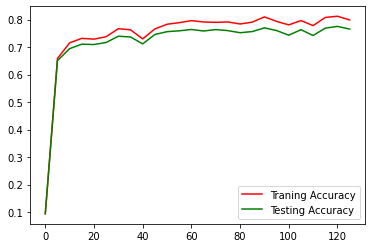

In [24]:
epochs = []
train_accuracy =[]
test_accuracy =[]
for i in range(26):
    epochs.append(i*5)
    model = tf.keras.models.load_model(f'files/ch07/multi_epoch{i*5}.h5')
    # Accuracy on the training dataset
    train_accu = model.evaluate(X_train, y_train)[1]
    train_accuracy.append(train_accu)
    # Accuracy on the testing dataset
    test_accu = model.evaluate(X_test, y_test)[1]
    test_accuracy.append(test_accu)    
# Plot the accuracies
plt.plot(epochs,train_accuracy,label='Traning Accuracy',color="r")
plt.plot(epochs,test_accuracy,label='Testing Accuracy',color="g")
plt.legend()
plt.show()

The accuracy score is above 70% for both the training and testing dataset after about 10 epochs of training.

## 4. Animate the Learning Process
We'll create animations to show the learning process of the DNN model we have created above. 

Specifically, we find a picture of a ship and a picture of a dog from the testing dataset. We then look at the predicted probabilities on these two pictures during the training process. We create a graph to show the model's predictions after each five epochs of training. We then combine the graphs to form an animation. 

### 4.1. Select Testing Pictures
We'll select two testing pictures from the testing dataset.

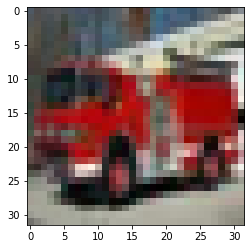

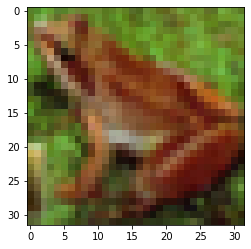

In [38]:
# Select a picture of a ship
truck=X_test[23]
# Select a picture of a dog
frog=X_test[29]

# Plot them to make sure
plt.imshow(truck)
plt.show()
plt.imshow(frog)
plt.show()

We have selected a picture of a ship and a picture of a dog.

Next, we'll save it on the computer for later use

In [40]:
import pickle
with open('files/ch07/truck_frog.p', 'wb') as fp:
    pickle.dump((truck, frog), fp)

### 4.2. Animate the Changing Predictions
Next, we'll create a plot of the prediction for the picture of the ship every five epochs of training.

In [42]:
from matplotlib.patches import Rectangle

# Load the testing pictures
truck, frog = pickle.load(open('files/ch07/truck_frog.p','rb'))

# Names of the labels
names = ['plane', 'car', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']    

# Generate 26 pictures
for stage in range(26):
    # reload the deep neural network
    reload = tf.keras.models.load_model(f"files/ch07/multi_epoch{stage*5}.h5")
    # the predictions from the DNN
    ps = reload.predict(truck.reshape(1,32,32,3))[0]
    fig = plt.figure(figsize=(14,10), dpi=100)
    ax = fig.add_subplot(111)  
    # Draw the four input neurons
    circle = plt.Circle((-3,4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)

    # Draw connections between neurons
    xys = [[(0.,0), (-2.2,2)],
           [(0.,0), (-2.2,-2)],
           [(-3.8,-2),(-5.5,-2)],
           [(-3.8,2),(-5.5,2)],
           [(-3.8,-4),(-5.5,-4)],
           [(-3.8,4),(-5.5,4)],
           [(0.,0), (-2.2,4)],
           [(0.,0), (-2.2,-4)],
           [(4,-4.1),(2,0)],
           [(4,-3.2),(2,0)],           
           [(4,-2.3),(2,0)],           
           [(4,-1.4),(2,0)],
           [(4,-0.5),(2,0)],
           [(4,0.4),(2,0)],
           [(4,1.3),(2,0)],
           [(4,2.2),(2,0)],
           [(4,3.1),(2,0)],
           [(4,4),(2,0)]]
    for xy in xys:
        ax.annotate("",xy=xy[0],xytext=xy[1],
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 2))  
    # Put explanation texts on the graph
    zs = [[-5.25, 4.1, "bias", 20, "k", 0],
            [-5.25, -3.9, "pixel", 20, "k", 0],
            [-3.2, 3.8, "1", 30, "k", 0],
            [-3.6, -4.2, r"$X_{3072}$", 30, "k", 0],
            [-3.3, 0.2, r"$\vdots$", 30, "k", 0],
            [-3.3, -0.4, r"$\vdots$", 30, "k", 0],
            [-5.25, 2.1, "pixel", 20, "k", 0],
            [-5.25, -1.9, "pixel", 20, "k", 0],        
            [-3.4, 1.8, r"$X_{1}$", 30, "k", 0],
            [-3.6, -2.2, r"$X_{3071}$", 30, "k", 0],
            [0.2, -0.5, "Deep\nNeural\nNetwork", 20, "k", 0]]
    for z in zs:
        plt.text(z[0], z[1], z[2], fontsize=z[3], color=z[4], rotation=z[5])  
    for i in range(10):
        plt.text(4.1, 4-0.9*i, f"p({names[i]})={ps[i]:.4f}", fontsize=15, color="r")  

    # put epoch number up
    plt.text(-1, 4.3, f"epoch {stage*5}", fontsize=40, color="g")   
    # add text to explain 
    txt = ax.annotate('Softmax\nActivation', 
        xy = (1,-1), 
        xytext = (0.5,0.2), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    txt = ax.annotate('convolutional\nlayers', 
        xy = (1,1), 
        xytext = (0.5,0.75), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    # add rectangle to plot
    ax.add_patch(Rectangle((0,-1), 2, 2,
                 edgecolor = 'k',alpha=0.1)) 
    ax.add_patch(Rectangle((4,-4.3), 2.6, 0.6,
                 facecolor = 'g',alpha=0.25))  
    ax.set_xlim(-7, 7)
    ax.set_ylim(-5, 5)
    plt.axis('off')
    # Add ship picture
    newax = fig.add_axes([0.1, 0.39, 0.23, 0.23])
    newax.imshow(truck)
    newax.axis('off')
    plt.savefig(f"files/ch07/p_truck{stage}.png")
    plt.close(fig)

1/1 [==============================] - 0s 46ms/step


If you go to the local folder and open the file p_truck0.png, you'll see a picture as follows:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_truck0.png" />
It shows that before training starts, the model puts a 12.17% probability that the picture is a truck. In contrast, if you open the file p_truck25.png, you'll see a picture as follows:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_truck25.png" />
It shows that after 125 epochs of training, the model puts a 98.76% probability that the picture is a truck. 

Next, you'll create an animation of the changing predictions over the course of the training.

In [43]:
import PIL
import imageio
import numpy as np

frames=[] 
for stage in range(26):
    frame=PIL.Image.open(f"files/ch07/p_truck{stage}.png")  
    frame=np.asarray(frame)
    frames.append(frame) 
imageio.mimsave('files/ch07/p_truck.gif', frames, fps=2) 

You can see the animation in the local folder, which looks like this:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_truck.gif" /> 

Similarly, you can create an animation of the changing predictions on the picture of the frog during the training process as follows.

In [44]:
# Generate 26 pictures
for stage in range(26):
    # reload the deep neural network
    reload = tf.keras.models.load_model(f"files/ch07/multi_epoch{stage*5}.h5")
    # the predictions from the DNN
    ps = reload.predict(frog.reshape(1,32,32,3))[0]
    fig = plt.figure(figsize=(14,10), dpi=100)
    ax = fig.add_subplot(111)  
    # Draw the four input neurons
    circle = plt.Circle((-3,4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-4),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)

    # Draw connections between neurons
    xys = [[(0.,0), (-2.2,2)],
           [(0.,0), (-2.2,-2)],
           [(-3.8,-2),(-5.5,-2)],
           [(-3.8,2),(-5.5,2)],
           [(-3.8,-4),(-5.5,-4)],
           [(-3.8,4),(-5.5,4)],
           [(0.,0), (-2.2,4)],
           [(0.,0), (-2.2,-4)],
           [(4,-4.1),(2,0)],
           [(4,-3.2),(2,0)],           
           [(4,-2.3),(2,0)],           
           [(4,-1.4),(2,0)],
           [(4,-0.5),(2,0)],
           [(4,0.4),(2,0)],
           [(4,1.3),(2,0)],
           [(4,2.2),(2,0)],
           [(4,3.1),(2,0)],
           [(4,4),(2,0)]]
    for xy in xys:
        ax.annotate("",xy=xy[0],xytext=xy[1],
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 2))  
    # Put explanation texts on the graph
    zs = [[-5.25, 4.1, "bias", 20, "k", 0],
            [-5.25, -3.9, "pixel", 20, "k", 0],
            [-3.2, 3.8, "1", 30, "k", 0],
            [-3.6, -4.2, r"$X_{3072}$", 30, "k", 0],
            [-3.3, 0.2, r"$\vdots$", 30, "k", 0],
            [-3.3, -0.4, r"$\vdots$", 30, "k", 0],
            [-5.25, 2.1, "pixel", 20, "k", 0],
            [-5.25, -1.9, "pixel", 20, "k", 0],        
            [-3.4, 1.8, r"$X_{1}$", 30, "k", 0],
            [-3.6, -2.2, r"$X_{3071}$", 30, "k", 0],
            [0.2, -0.5, "Deep\nNeural\nNetwork", 20, "k", 0]]
    for z in zs:
        plt.text(z[0], z[1], z[2], fontsize=z[3], color=z[4], rotation=z[5])  
    for i in range(10):
        plt.text(4.1, 4-0.9*i, f"p({names[i]})={ps[i]:.4f}", fontsize=15, color="r")  

    # put epoch number up
    plt.text(-1, 4.3, f"epoch {stage*5}", fontsize=40, color="g")   
    # add text to explain 
    txt = ax.annotate('Softmax\nActivation', 
        xy = (1,-1), 
        xytext = (0.5,0.2), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    txt = ax.annotate('convolutional\nlayers', 
        xy = (1,1), 
        xytext = (0.5,0.75), 
        textcoords = 'axes fraction', 
        bbox = dict(boxstyle="round", fc="0.9"), 
        arrowprops=dict(arrowstyle = '->', color = 'g', linewidth = 1), 
        fontsize = 20)
    # add rectangle to plot
    ax.add_patch(Rectangle((0,-1), 2, 2,
                 edgecolor = 'k',alpha=0.1)) 
    ax.add_patch(Rectangle((4,-1.6), 2.6, 0.6,
                 facecolor = 'g',alpha=0.25))  
    ax.set_xlim(-7, 7)
    ax.set_ylim(-5, 5)
    plt.axis('off')
    # Add ship picture
    newax = fig.add_axes([0.1, 0.39, 0.23, 0.23])
    newax.imshow(frog)
    newax.axis('off')
    plt.savefig(f"files/ch07/p_frog{stage}.png")
    plt.close(fig)
    
frames=[] 
for stage in range(26):
    frame=PIL.Image.open(f"files/ch07/p_frog{stage}.png")  
    frame=np.asarray(frame)
    frames.append(frame) 
imageio.mimsave('files/ch07/p_frog.gif', frames, fps=2) 

1/1 [==============================] - 0s 44ms/step


You can see the animation in the local folder, which looks like this:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_frog.gif" /> 

Before training starts, the model puts a 8.78% probability that the picture is a frog. After 125 epochs of training, the model puts a 99.86% probability that the picture is a frog. 

### 4.3. Combine the Animations
We can now combine the two animations into one so that we can see the changing predictions for the two pictures side by side.

In [46]:
frames=[] 
for stage in range(26):
    frame1=PIL.Image.open(f"files/ch07/p_truck{stage}.png")  
    frame1=np.asarray(frame1)

    frame2=PIL.Image.open(f"files/ch07/p_frog{stage}.png")  
    frame2=np.asarray(frame2)
    
    frame=np.concatenate([frame1, frame2], axis=1)
    
    frames.append(frame) 
imageio.mimsave('files/ch07/p_truck_frog.gif', frames, fps=2) 

You can see the animation in the local folder, which looks like this:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_truck_frog.gif" /> 